In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
#Importamos datos experimentales
medidos = pd.read_csv('../../proyecto_final_EE-main/data/weekends.csv',index_col=0,parse_dates=True,names=['tiempo','Ti_ex'],skiprows=1) 
medidos

,Ti_ex
tiempo,
2019-06-08 00:00:00,25.348056
2019-06-08 00:00:20,25.354979
2019-06-08 00:00:40,25.359593
2019-06-08 00:01:00,25.348056
2019-06-08 00:01:20,25.351517
...,...
2019-07-28 23:58:20,24.798895
2019-07-28 23:58:40,24.802356
2019-07-28 23:59:00,24.673142


In [4]:
CP = pd.read_csv('../IDF/Caso_pintura/Proyecto_fin_absortancia.csv',names=['tiempo','Ti_C1','Ti_C2','Ti_CP','Ti_techo1','Ti_techo2','Ti_techoJorge'],skiprows=1)
CP.tiempo = CP.tiempo.str.replace('24:00:00','23:59:59')
CP.tiempo = '2019 ' + CP.tiempo
CP.tiempo = pd.to_datetime(CP.tiempo,format='%Y %m/%d %H:%M:%S')
CP.set_index('tiempo',inplace=True)
del CP['Ti_C1']
del CP['Ti_C2']
del CP['Ti_techo1']
del CP['Ti_techo2']
del CP['Ti_techoJorge']
CP

,Ti_CP
tiempo,
2019-05-03 00:10:00,27.708771
2019-05-03 00:20:00,27.630984
2019-05-03 00:30:00,27.497868
2019-05-03 00:40:00,27.399207
2019-05-03 00:50:00,27.390860
...,...
2019-06-25 23:20:00,8.128806
2019-06-25 23:30:00,8.061962
2019-06-25 23:40:00,7.995623


In [5]:
compara  = pd.concat([medidos,CP],axis=1)
compara

,Ti_ex,Ti_CP
tiempo,,
2019-05-03 00:10:00,NaN,27.708771
2019-05-03 00:20:00,NaN,27.630984
2019-05-03 00:30:00,NaN,27.497868
2019-05-03 00:40:00,NaN,27.399207
2019-05-03 00:50:00,NaN,27.390860
...,...,...
2019-07-28 23:58:20,24.798895,NaN
2019-07-28 23:58:40,24.802356,NaN
2019-07-28 23:59:00,24.673142,NaN


## Hacemos la gráfica de fechas de validación

### 08/06/2019

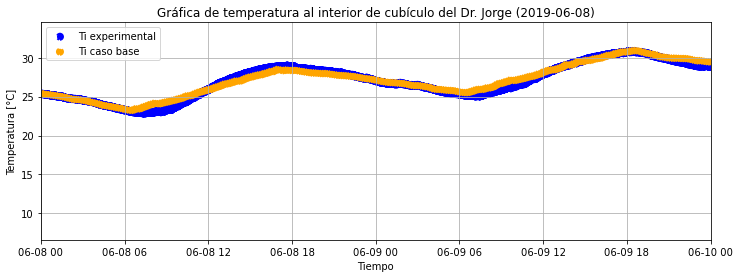

In [6]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-08')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti_ex,linestyle='-.', linewidth=2, color='blue', label="Ti experimental")
ax.scatter(compara.index,compara.Ti_CP, linestyle='--', linewidth=2, color='orange', label="Ti caso base")
fin1 = compara[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-08)')
ax.legend()
ax.grid()


### 15/06/2019

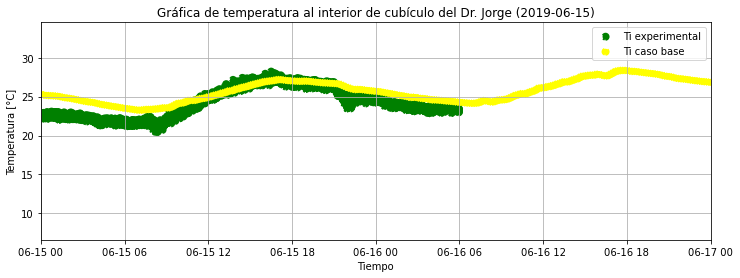

In [7]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-15')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti_ex,linestyle='-.', linewidth=2, color='green', label="Ti experimental")
ax.scatter(compara.index,compara.Ti_CP, linestyle='--', linewidth=2, color='yellow', label="Ti caso base")
fin2 = compara[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-15)')
ax.legend()
ax.grid()

### 22/06/2019

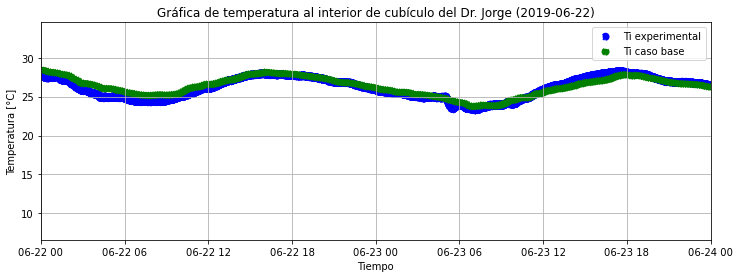

In [8]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-22')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti_ex,linestyle='-.', linewidth=2, color='blue', label="Ti experimental")
ax.scatter(compara.index,compara.Ti_CP, linestyle='--', linewidth=2, color='green', label="Ti caso base")
fin3 = compara[fecha1:fecha2]

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-22)')
ax.legend()
ax.grid()


In [9]:
analisis = pd.concat([fin1,fin2,fin3],axis=0)
analisis

,Ti_ex,Ti_CP
tiempo,,
2019-06-08 00:00:00,25.348056,NaN
2019-06-08 00:00:20,25.354979,NaN
2019-06-08 00:00:40,25.359593,NaN
2019-06-08 00:01:00,25.348056,NaN
2019-06-08 00:01:20,25.351517,NaN
...,...,...
2019-06-23 23:58:40,26.435996,NaN
2019-06-23 23:59:00,26.429073,NaN
2019-06-23 23:59:20,26.425612,NaN


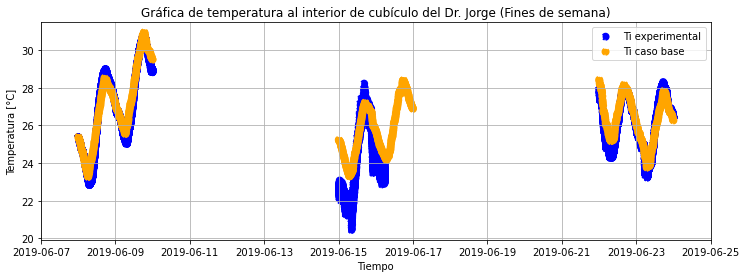

In [10]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-07')
fecha2 = fecha1 + pd.Timedelta('18D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(analisis.index,analisis.Ti_ex,linestyle='-.', linewidth=2, color='blue', label="Ti experimental")
ax.scatter(analisis.index,analisis.Ti_CP, linestyle='--', linewidth=2, color='orange', label="Ti caso base")

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (Fines de semana)')
ax.legend()
ax.grid()